In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

In [131]:
avo = pd.read_csv("avocado.csv",parse_dates=['Date'], index_col = 0)
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [132]:
#check missing values in our dataset
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [133]:
#convert column 'Date' in to data-time type and sort the data by date ascendingly 
avo['Date'] = pd.to_datetime(avo['Date'])
date = avo['Date']
avo = avo.sort_values('Date')
avo = avo.reset_index(drop=True)
avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [134]:
#range of time in advocado dataset
timeRange = (avo.Date[0],avo.Date[18248])
timeRange

(Timestamp('2015-01-04 00:00:00'), Timestamp('2018-03-25 00:00:00'))

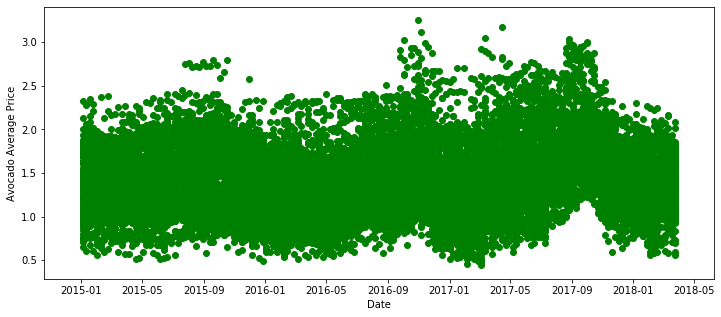

In [135]:
fig, axes = plt.subplots(figsize=(12,5))
axes.scatter(avo['Date'], avo['AveragePrice'], color='green')
axes.set_xlabel('Date')
axes.set_ylabel('Avocado Average Price')
plt.show()

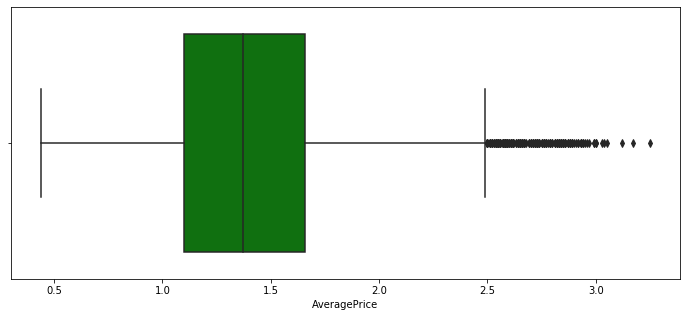

In [136]:
sns.boxplot(x=avo['AveragePrice'], color = 'green')
plt.show()

##### Let's plot the histogram for average price of avocado

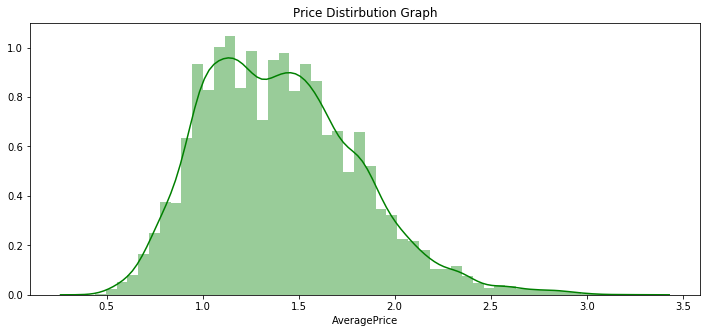

In [137]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(avo["AveragePrice"], color = 'green')

##### Aa we can see here, the distribution is nearly normal distribution
##### Now let's plot the avocado's price over time

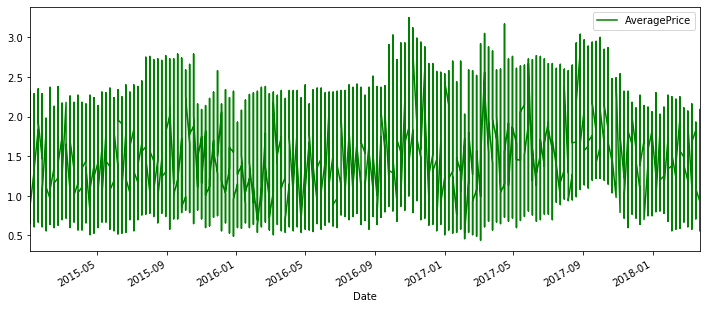

In [138]:
price = avo[['Date','AveragePrice']]
price.set_index('Date').plot(figsize=(12,5), color = 'green')
plt.show()

##### The graph seems a little to crowded to look at, , let's make it more visible
##### Instead of use the average daily price, let's resampling our data of the average monthly price and use the first day of each month as the time stamp.

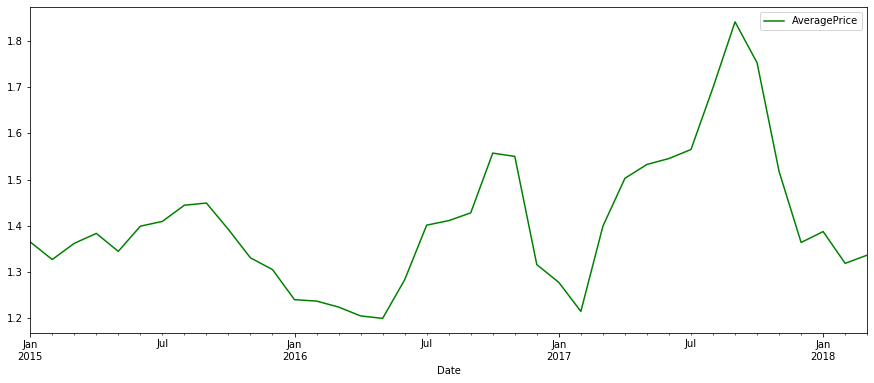

In [139]:
price = avo[['Date','AveragePrice']]
priceMS = price.set_index('Date').resample('MS').mean()
priceMS.plot(figsize=(15, 6), color= 'green')
plt.show()

##### Let's plot our data year by year

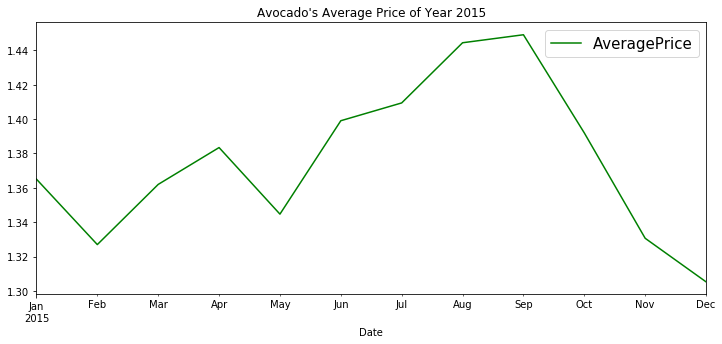

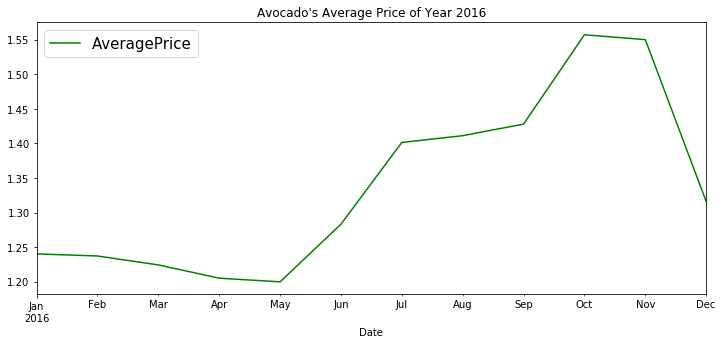

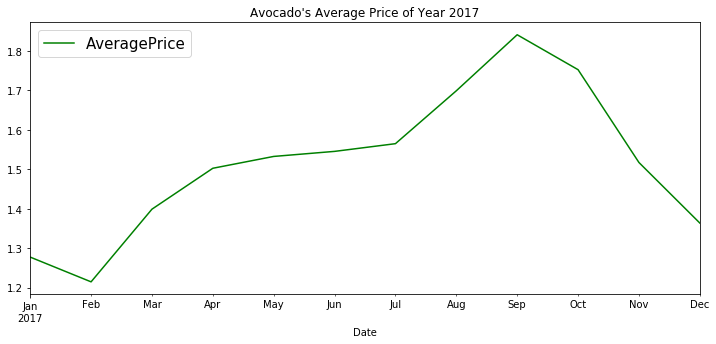

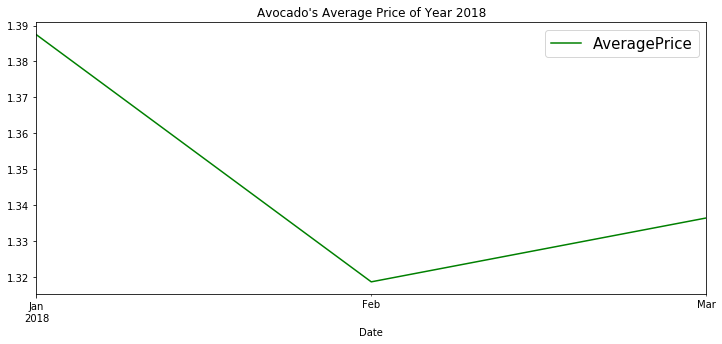

In [140]:
years = np.unique(avo['year'])

for year in years:
    price = avo[['Date','AveragePrice','year']]
    price = price[price['year']==year]
    price = price.drop(columns = ['year'])
    priceMs = price.set_index('Date').resample('MS').mean()
    priceMs.plot(figsize=(12, 5), color= 'green', label= 'year')
    plt.title(f"Avocado's Average Price of Year {year}")
    plt.legend(fontsize = 15)
    plt.show()

### Observations:
##### The average price respectively low in Spring and Winter and high in Summer and Fall. ##### There is always an upward trend in each year. 
##### Data in 2018 stops in March.
##### These patterns are resonable because demand is higher during Summer and Fall.  And the upward trend is probably because more and more people start eating avocado?

##### -------------------------------------------------------------------------------------------------------------------------------
#####  Let's decompose our time series into three distinct components: trend, seasonality, and noise using decomposition method.

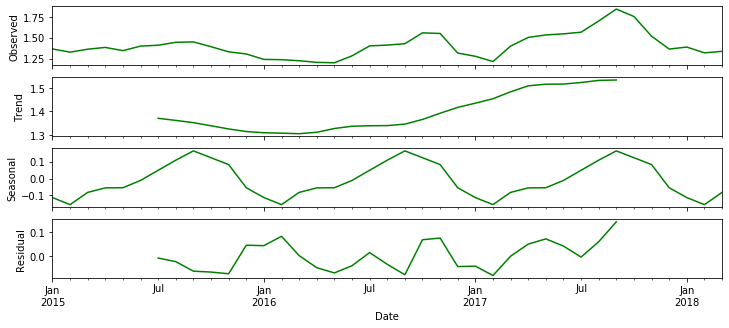

In [155]:
rcParams['figure.figsize'] = 12, 5
decomposition = sm.tsa.seasonal_decompose(priceMS, model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'g')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='g')
axes[3].set_ylabel('Residual')
plt.show()